### Telecommunications Provider based on KNN algorithm

A communication service provider can divide a customer's membership into four categories based on multiple independent variables such asage, region, material, income, etc.

#### Independed Variables
- region
- tenure
- age
- marital
- addree
- income
- ed
- employ
- retire
- gender
- reside
#### Target (depended varibale)
- custcat

#### Tools
To work with this project, multiple libraries and frameworks need to be installed. The following is a list of them.


- [Pandas](https://pandas.pydata.org/)
- [NumPy](https://numpy.org/)
- [Matplotlib](https://matplotlib.org/)
- [Sciki-learn](https://scikit-learn.org/stable/)

#### Import the required packets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

#### Load the data

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head(3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3


Count the number of classes in the 'custcat'

In [3]:
df['custcat'].value_counts()
# len(df['custcat'].value_counts())

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

#### Independent data 

In [5]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values

#### Dependent data

In [6]:
y = df['custcat'].values

#### Normalize data

In [7]:
stander = preprocessing.StandardScaler()
stander.fit(X)
X = stander.transform(X)
X[:1]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004]])

#### Split the data into 80% for training and 20% for testing.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


### K nearest neighbor (KNN)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
model = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
model

KNeighborsClassifier(n_neighbors=2)

In [10]:
yhat = model.predict(X_test)
yhat[:3]

array([3, 1, 1], dtype=int64)

### Accuracy evaluation

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
# result = metrics.classification_report(y_test, yhat)
# result

Train set Accuracy:  0.6175
Test set Accuracy:  0.29


#### Changing the K value

Text(0, 0.5, 'Accuracy score')

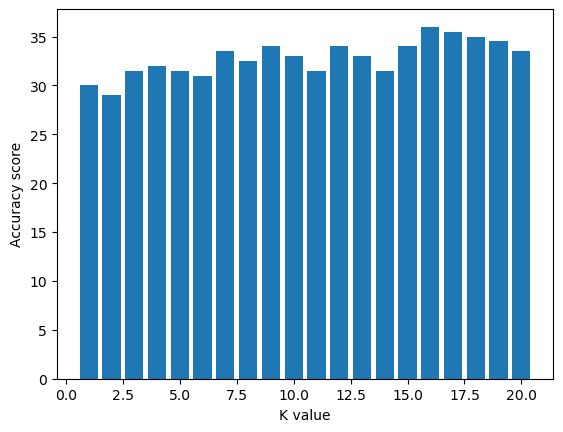

In [12]:
k = 20
results = []
for i in range(1,k+1):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    ac = metrics.accuracy_score(y_test, yhat)
    results.append(ac)

plt.bar( np.arange(1,k+1), [i * 100 for i in results])
plt.xlabel('K value')
plt.ylabel('Accuracy score')

In [13]:
print('The best accuracy achieved where k is equal to ', str(results.index(max(results))), "The accuracy is ",str(results[15]*100)+"%")

The best accuracy achieved where k is equal to  15 The accuracy is  36.0%


#### Deploying

In [14]:
import joblib
import os
if not os.path.exists('Model'):
        os.mkdir('Model')
if not os.path.exists('Scaler'):
        os.mkdir('Scaler')
        
joblib.dump(model, r'Model/model.pickle')
joblib.dump(stander, r'Scaler/scaler.pickle')


['Scaler/scaler.pickle']

#### Add new data and load the model

In [15]:
new_data = pd.DataFrame([{'region':2, 'tenure':13,'age':45, 'marital':1, 'address':9, 'income':64.000, 'ed':4, 'employ':5,'retire':0.000, 'gender':0, 'reside':2}])
new_data = new_data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
new_data

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,45,1,9,64.0,4,5,0.0,0,2


In [19]:
import joblib
model = joblib.load(r'Model/model.pickle')
scaler = joblib.load(r'Scaler/scaler.pickle')
new_data = scaler.transform(new_data)
model.predict(new_data)

array([1], dtype=int64)